<a href="https://colab.research.google.com/github/Azmain-Elahi/Machine-Learning/blob/main/student_perform_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn prepocessing

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#regreession
from sklearn.linear_model import LinearRegression,Ridge

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor

#matrices

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("/content/bangladesh_student_performance.csv")

In [3]:
df

,date,gender,age,address,famsize,Pstatus,M_Edu,F_Edu,M_Job,F_Job,relationship,smoker,tuition_fee,time_friends,ssc_result,hsc_result
0,29/04/2018,M,18,Rural,GT3,Together,3,2,At_home,Farmer,No,No,71672,4,4.22,3.72
1,29/04/2018,F,19,Rural,LE3,Apart,0,4,Other,Health,Yes,No,26085,5,3.47,2.62
2,29/04/2018,F,19,Rural,GT3,Together,0,3,Teacher,Services,No,No,40891,3,3.32,2.56
3,29/04/2018,F,19,Rural,LE3,Apart,2,3,At_home,Business,No,No,50600,2,4.57,4.17
4,29/04/2018,M,17,Rural,GT3,Together,1,1,At_home,Farmer,No,No,62458,2,4.50,3.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,29/04/2018,M,18,Urban,GT3,Together,2,2,Teacher,Health,No,No,108426,2,3.57,3.18
2014,29/04/2018,M,19,Urban,GT3,Together,0,3,Other,Teacher,Yes,No,100665,5,4.05,3.13
2015,29/04/2018,M,18,Urban,GT3,Together,3,2,Services,Farmer,Yes,No,92291,1,3.93,3.15
2016,29/04/2018,M,19,Rural,GT3,Together,0,2,At_home,Teacher,No,No,43926,3,3.34,2.83


Y DATA profiling


In [4]:
!pip install ydata profiling

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.1/296.1 kB 7.3 MB/s eta 0:00:00
  Created wheel for ydata: filename=ydata-0.2-py3-none-any.whl size=3422 sha256=79cabf26433a2a4cc0d6265d6314d0011340d4588012d88a017d637d38cac701
  Stored in directory: /root/.cache/pip/wheels/0a/e9/fb/3b84652c9f18b9038f8cdd6673f3cb22b4524b3754f1ec6b86
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for profiling
  Running setup.py clean for profiling
  Created wheel for valuedispatch: filename=valuedispatch-0.0.1-py3-none-any.whl size=2018 sha256=feaa4996b8c177b074f7bb8391e0bb4533125277830dc41167fc74ed01e40e47
  Stored in directory: /root/.cache/pip/wheels/75/85/94/7a977e6a

In [5]:
pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.0 MB/s eta 0:00:00


In [6]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Bangladesh student performance Report",explorative= True)

profile.to_file("ydata.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:00<00:00, 21.56it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
len(df.columns)

16

In [8]:
#simpilfy

df.columns

Index(['date', 'gender', 'age', 'address', 'famsize', 'Pstatus', 'M_Edu',
       'F_Edu', 'M_Job', 'F_Job', 'relationship', 'smoker', 'tuition_fee',
       'time_friends', 'ssc_result', 'hsc_result'],
      dtype='object')

In [9]:
df.columns = [
    'data','st_grnder','st_age','st_address',
    'st_fam_size','pstatus','m_edu','f_edu',
    'm_job','f_jobs',
    'st_relationship','smoker','tuition_fee','time_with_friends','ssc_result','hsc_result'

]

In [10]:
df.columns

Index(['data', 'st_grnder', 'st_age', 'st_address', 'st_fam_size', 'pstatus',
       'm_edu', 'f_edu', 'm_job', 'f_jobs', 'st_relationship', 'smoker',
       'tuition_fee', 'time_with_friends', 'ssc_result', 'hsc_result'],
      dtype='object')

In [11]:
#drop date
if 'date' in df.columns:
  df.drop(columns = ['date'],inplace= True)

In [12]:
corr_target = df.select_dtypes(include = np.number).corr()['hsc_result'].sort_values(ascending=False)

In [13]:
corr_target


,hsc_result
hsc_result,1.000000
ssc_result,0.950178
m_edu,0.063776
f_edu,0.054811
tuition_fee,0.038068
st_age,-0.009857
time_with_friends,-0.156356


In [14]:
#separate X and y
X = df.drop('hsc_result',axis = 1)
y= df['hsc_result']


In [15]:
X

,data,st_grnder,st_age,st_address,st_fam_size,pstatus,m_edu,f_edu,m_job,f_jobs,st_relationship,smoker,tuition_fee,time_with_friends,ssc_result
0,29/04/2018,M,18,Rural,GT3,Together,3,2,At_home,Farmer,No,No,71672,4,4.22
1,29/04/2018,F,19,Rural,LE3,Apart,0,4,Other,Health,Yes,No,26085,5,3.47
2,29/04/2018,F,19,Rural,GT3,Together,0,3,Teacher,Services,No,No,40891,3,3.32
3,29/04/2018,F,19,Rural,LE3,Apart,2,3,At_home,Business,No,No,50600,2,4.57
4,29/04/2018,M,17,Rural,GT3,Together,1,1,At_home,Farmer,No,No,62458,2,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,29/04/2018,M,18,Urban,GT3,Together,2,2,Teacher,Health,No,No,108426,2,3.57
2014,29/04/2018,M,19,Urban,GT3,Together,0,3,Other,Teacher,Yes,No,100665,5,4.05
2015,29/04/2018,M,18,Urban,GT3,Together,3,2,Services,Farmer,Yes,No,92291,1,3.93
2016,29/04/2018,M,19,Rural,GT3,Together,0,2,At_home,Teacher,No,No,43926,3,3.34


In [16]:
y

,hsc_result
0,3.72
1,2.62
2,2.56
3,4.17
4,3.94
...,...
2013,3.18
2014,3.13
2015,3.15
2016,2.83


In [17]:
#Numerical Column and Categorical Columns
numeric_features = X.select_dtypes(include = ['int64','float64']).columns
categorical_features = X.select_dtypes(include = ['object']).columns

In [18]:
#pipeline
#for numerical

num_transformer = Pipeline(
    steps = [
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())

    ]
)

In [19]:
#For Categorigal

cat_transformer = Pipeline(
    steps = [
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('encoder',OneHotEncoder(handle_unknown='ignore'))


    ]
)



In [20]:
#combine them
preprocessor =  ColumnTransformer(
    transformers = [
        ('num',num_transformer,numeric_features),
        ('cat',cat_transformer,categorical_features)
    ]
)

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

#Ensemble - boosting,stacking

In [22]:
#base learner

reg_lr = LinearRegression()

reg_rf = RandomForestRegressor(n_estimators=100,random_state= 42)
reg_gb = GradientBoostingRegressor(n_estimators=100,random_state=42)



In [23]:
voting_reg = VotingRegressor(
    estimators = [
        ('lr',reg_lr),
        ('rf',reg_rf),
        ('gb',reg_gb)

    ]
)

In [24]:
#stacking

stacking_reg = StackingRegressor(
    estimators = [
        ('rf',reg_rf),
        ('gb',reg_gb)
    ],
    final_estimator= Ridge()#the meta learner
)

In [25]:
#dictionary of all model

model_to_train = {
    'LinearRegression':reg_lr,
    'RandomForestRegressor':reg_rf,
    'GradientBoostingRegressor':reg_gb,
    'VotingRegressor':voting_reg,
    'StackingRegressor':stacking_reg
}


In [26]:
#training & Evaluation

result = []

for name , model in model_to_train.items():
  #create full pipeline with preprocessor
  pipe = Pipeline(
      [
          ('preprocessor', preprocessor),
          ('model',model)
      ]
  )

  #train

  pipe.fit(X_train,y_train)

  #predict

  y_pred = pipe.predict(X_test)

  #Evaluate

  r2 = r2_score(y_test,y_pred)
  rmse = np.sqrt(mean_squared_error(y_test,y_pred))
  mae = mean_absolute_error(y_test,y_pred)

  result.append({
      "Model": name,
      "R2 Score" :r2,
      "RMSE": rmse,
      "MAE" : mae
  })

results_df = pd.DataFrame(result).sort_values("R2 Score", ascending=False)

print(results_df)

                       Model  R2 Score      RMSE       MAE
4          StackingRegressor  0.959593  0.123064  0.098701
2  GradientBoostingRegressor  0.959565  0.123107  0.098902
3            VotingRegressor  0.957566  0.126113  0.100854
1      RandomForestRegressor  0.950456  0.136269  0.108434
0           LinearRegression  0.945920  0.142371  0.111376


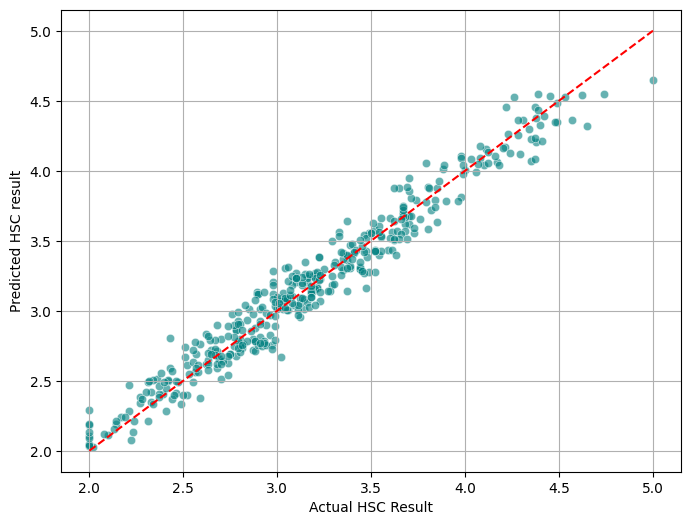

In [27]:
#visulization
best_model_name = results_df.iloc[0]['Model']
best_model_obj = model_to_train[best_model_name]


#fit the best model

final_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model',best_model_obj)
])

final_pipe.fit(X_train,y_train)
y_final_pred = final_pipe.predict(X_test)


#plot Actual vs predicted

plt.figure( figsize = (8,6) )

sns.scatterplot(x=y_test, y=y_final_pred, alpha = 0.6, color='teal' )
plt.plot( [2,5] , [2,5], color = "red", linestyle = '--'  )

plt.xlabel("Actual HSC Result")
plt.ylabel("Predicted HSC result")

plt.grid(True)
plt.show()

Cross validation


In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
rf_pipeline = Pipeline(
    [('preprocessor',preprocessor),
     ('model',RandomForestRegressor(n_estimators=100,random_state=42))
     ]

)

In [30]:
# 5 fold cv
cv_scores = cross_val_score(rf_pipeline,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

print(cv_rmse)

[0.13900372 0.14184706 0.15328505 0.14804407 0.12950767]


In [31]:
print(cv_rmse.mean())

0.14233751462676933


In [32]:
print(cv_rmse.std())

0.008103983445488214


In [33]:
#Staking enseble

stacking_pipeline = Pipeline(
    [('preprocessor',preprocessor),
     ('model',stacking_reg)
     ]

)

In [34]:
# 5 fold cv
cv_scores = cross_val_score(stacking_pipeline,
                            X_train,
                            y_train,
                            cv=5,
                            scoring='neg_mean_squared_error',
                            n_jobs = -1 #use all process core,to spped it up
                            )
stacking_rmse = np.sqrt(-cv_scores)

print(stacking_rmse)

[0.12746957 0.13430678 0.13320763 0.13395684 0.11923128]


In [35]:
#Grid search Cv

rf_pipeline = Pipeline(
    [('preprocessor',preprocessor),
     ('model',RandomForestRegressor(n_estimators=100,random_state=42))
     ]

)

In [36]:
#define the grid

param_grid = {
    'model__n_estimators' : [100,200] ,
    'model__max_depth': [None,10,20],
    'model__min_samples_split' : [2,5]
}

In [37]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator = rf_pipeline,
    param_grid = param_grid,
    cv = 5 ,
    scoring = 'neg_root_mean_squared_error',
    n_jobs =-1,
    verbose = 2

)



In [38]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['st_age', 'm_edu', 'f_edu', 'tuition_fee', 'time_with_friends',
       'ssc_result'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['data', 'st_grnder', 'st_address', 'st_fam_size', 'pstatus', 'm_job',
       'f_jobs', 'st_relationship', 'smoker'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [39]:
print(-grid_search.best_score_)

0.14128105381273814


In [40]:
print(grid_search.best_params_)

{'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 200}


In [41]:
from scipy.stats import randint

my_dist = randint(1,10)

print(my_dist.rvs())
print(my_dist.rvs())
print(my_dist.rvs(size=5))

8
1
[4 7 3 5 3]


In [42]:
param_dist = {
    'model__n_estimators' : randint(100,200) ,
    'model__max_depth': [None,10,20],
    'model__min_samples_split' : randint(1,10)
}

In [43]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator = rf_pipeline,
    param_distributions = param_dist,
    n_iter = 1,
    cv = 5 ,
    scoring = 'neg_root_mean_squared_error',
    n_jobs =-1,
    verbose = 2,
    random_state = 42

)


In [44]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['st_age', 'm_edu', 'f_edu', 'tuition_fee', 'time_with_friends',
       'ssc_result'],
      dtype='object')),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy=...
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'model__max_depth': [None, 10, 20],
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a2a92cb81a0>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a2a92ca50d0>},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [45]:
print(-random_search.best_score_)


0.14163679686057787


In [46]:
print(random_search.best_params_)

{'model__max_depth': 20, 'model__min_samples_split': 4, 'model__n_estimators': 192}


SAVE MODEL

In [67]:
import pickle
from sklearn.linear_model import LinearRegression

X_train_lr = [[1],[2],[3],[4],[5]  ] #study
y_train_lr = [10,20,30,40,50] #marks

model = LinearRegression()
model.fit(X_train_lr,y_train_lr)

LinearRegression()

In [59]:
model.predict( [ [6]  ]  )[0]

np.float64(59.99999999999999)

In [60]:
filename = "model.pkl"

with open ( filename, "wb") as file:
  pickle.dump(model,file)

In [61]:
#the next day(load)

with open("/content/model.pkl","rb") as file:
  loaded_model = pickle.load(file)

In [51]:
loaded_model.predict([[7]])

array([70.])

Random forest

In [62]:
filename = "random_forest_model.pkl"

with open ( filename, "wb") as file:
  pickle.dump(random_search,file)

In [63]:
with open("/content/random_forest_model.pkl","rb") as file:
  rf_loaded_model = pickle.load(file)

In [64]:
rf_loaded_model.predict(X_test)

array([3.25446918, 3.6336893 , 3.67547532, 3.94369308, 4.10625558,
       3.26537169, 4.09543607, 2.49514277, 2.10167055, 3.27476027,
       3.55407418, 2.9309195 , 3.1926096 , 4.49555239, 3.03266109,
       2.6429964 , 3.61785489, 3.36982246, 2.87653801, 2.87355148,
       2.74284633, 3.19570503, 2.88897396, 3.23562969, 2.04678507,
       2.64962428, 3.22684784, 4.05121396, 3.10996902, 4.10112477,
       2.46128912, 3.83400225, 4.49693097, 2.55479473, 3.18851426,
       3.21528342, 2.7294115 , 3.5651003 , 2.45336076, 2.60522594,
       3.00013232, 2.97554074, 3.65278437, 2.76859991, 2.32468473,
       3.00208604, 2.61290842, 2.69689   , 4.10184423, 3.22551755,
       2.99326827, 3.4155543 , 4.2414951 , 3.53919077, 2.99552335,
       3.22728309, 3.25962122, 2.78614809, 3.70677102, 2.69274554,
       3.04121019, 2.65743165, 2.5160377 , 4.42900246, 2.57439813,
       3.21831825, 3.86515024, 2.73223562, 3.06875719, 3.24582533,
       3.0070855 , 2.62434935, 2.71861876, 3.43539246, 3.05326

#MLFLOW

In [55]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.0 MB/s eta 0:00:00


In [56]:
import mlflow


In [57]:
mlflow.set_tracking_uri( "file:///content/mlruns" )
mlflow.set_experiment("test_run")

with mlflow.start_run(run_name="Dummy_test"):
  mlflow.log_metric("Accuracy",0.95)
  mlflow.log_metric("Loss",0.05)

  #parameter

  mlflow.log_param("model_type","fake_model_v1")
  mlflow.log_param("Learning Rate",0.001)




2026/01/19 13:40:03 INFO mlflow.tracking.fluent: Experiment with name 'test_run' does not exist. Creating a new experiment.


#RF using MLFLOW


In [69]:
import mlflow
import mlflow.sklearn
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

mlflow.set_experiment("Student performence using rf")

my_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'random_state': 42
}

simple_rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(**my_params))
])



#start mlflow

with mlflow.start_run(run_name="Random Forest"):
  mlflow.log_params(my_params)

  mlflow.log_param("model_type","RandomForestRegressor")

  #train
  simple_rf_pipeline.fit(X_train,y_train)

  y_train_pred = simple_rf_pipeline.predict(X_train)
  train_rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))

  #log train detalis

  mlflow.log_metric("train rmse",train_rmse)


  #test

  y_test_pred = simple_rf_pipeline.predict(X_test)
  test_rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
  mlflow.log_metric("test rmse",test_rmse)



In [70]:
test_rmse

np.float64(0.1359980104049972)